## make perturbed data and separated data

### *Source data:*
 + eeg: 4514
 + eog: 3400
 + emg: 5598

    all data has been z_scored

### *Perturbed data:*
add a random eeg, a random eog and a random emg. shape [1, 1, length]

### *Separated data:*
combine a random eeg, a random eog and a random emg as a (1, 3, length)

In [30]:
import numpy as np
import os

In [31]:
pure_eeg = np.load(r'/home/wyl/projects/_BSS_hijack/data/source_data/EEG.npy')
pure_emg = np.load(r'/home/wyl/projects/_BSS_hijack/data/source_data/EMG.npy')
pure_eog = np.load(r'/home/wyl/projects/_BSS_hijack/data/source_data/EOG.npy')

test_number = 300

eeg_trials = pure_eeg.shape[0] - test_number
emg_trials = pure_emg.shape[0] - test_number
eog_trials = pure_eog.shape[0] - test_number

print(eog_trials)
print(eeg_trials)
print(emg_trials)

3100
4214
5298


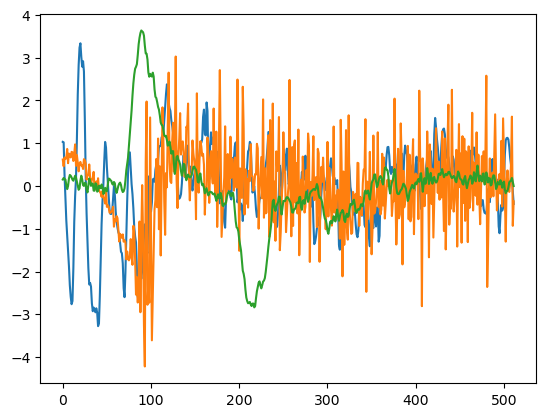

In [32]:
import matplotlib.pyplot as plt

line_eeg = pure_eeg[0]
line_eog = pure_eog[0]
line_emg = pure_emg[0]

plt.plot(line_eeg)
plt.plot(line_emg)
plt.plot(line_eog)
plt.show()

In [33]:
def data_perturb(eeg, emg, eog):
    perturbed = eeg[None, ...] + emg[None, ...] + eog[None, ...]
    return perturbed

def data_combine(eeg, emg, eog):
    combined = np.concatenate((eeg[None, ...], emg[None, ...], eog[None, ...]), axis=0)
    return combined

# get train data
def data_perturb_combine(eeg_trials, emg_trials, eog_trials, trials = 6000):
    np.random.seed(1)
    eeg_random = np.floor(np.random.rand(trials) * eeg_trials).astype(int)
    emg_random = np.floor(np.random.rand(trials) * emg_trials).astype(int)
    eog_random = np.floor(np.random.rand(trials) * eog_trials).astype(int)
    perturbed_data = []
    combined_data = []

    for i in range(trials):
        get_eeg = pure_eeg[eeg_random[i]]
        get_emg = pure_emg[emg_random[i]]
        get_eog = pure_eog[eog_random[i]]
        perturbed = data_perturb(get_eeg, get_emg, get_eog)[None, ...]
        perturbed_data.append(perturbed)
        combined = data_combine(get_eeg, get_emg, get_eog)[None, ...]
        combined_data.append(combined)
    
    np.save(r'/home/wyl/projects/_BSS_hijack/data/perturbed_data' + '/' + 'perturbed.npy', perturbed_data)
    np.save(r'/home/wyl/projects/_BSS_hijack/data/separated_data' + '/' + 'combined.npy', combined_data)

    return perturbed, combined


# get test datas
def build_test_data(eeg_trials, emg_trials, eog_trials, number_of_test = test_number, trials = 333):
    np.random.seed(0)
    eeg_random = np.floor(np.random.rand(trials) * number_of_test).astype(int) + eeg_trials
    emg_random = np.floor(np.random.rand(trials) * number_of_test).astype(int) + emg_trials
    eog_random = np.floor(np.random.rand(trials) * number_of_test).astype(int) + eog_trials
    perturbed_data = []
    combined_data = []

    for i in range(trials):
        get_eeg = pure_eeg[eeg_random[i]]
        get_emg = pure_emg[emg_random[i]]
        get_eog = pure_eog[eog_random[i]]
        perturbed = data_perturb(get_eeg, get_emg, get_eog)[None, ...]
        perturbed_data.append(perturbed)
        combined = data_combine(get_eeg, get_emg, get_eog)[None, ...]
        combined_data.append(combined)
    
    np.save(r'/home/wyl/projects/_BSS_hijack/data/perturbed_data' + '/' + 'perturbed_test.npy', perturbed_data)
    np.save(r'/home/wyl/projects/_BSS_hijack/data/separated_data' + '/' + 'combined_test.npy', combined_data)

    return perturbed, combined


In [34]:
data_perturb_combine(eeg_trials, emg_trials, eog_trials)
build_test_data(eeg_trials, emg_trials, eog_trials)

(array([[[-1.49240792e+00, -1.84952319e+00,  7.82328297e-02,
          -2.28818024e+00, -1.90505410e+00, -2.23312738e-02,
           6.22390788e-01, -1.05721507e+00, -2.56863346e-01,
          -9.50470753e-01, -6.66457526e-01, -6.49562859e-01,
           4.36917788e-02, -2.84869627e-01, -2.69821375e+00,
           1.53927016e+00,  9.67961759e-01,  3.80921016e-02,
           2.84510615e+00,  1.32992972e+00,  2.11274318e+00,
          -3.04451427e-02,  1.49494559e+00, -2.14830671e+00,
          -6.30786312e-01,  1.60595578e+00,  6.14151289e-01,
          -2.27509233e+00, -9.23320067e-01, -1.48672519e+00,
           3.89450186e+00, -2.64054926e+00, -9.18991850e-02,
          -1.49698676e+00, -2.96563437e-01, -2.13282131e+00,
          -2.48998353e-02,  2.86233824e+00, -4.16601831e+00,
           4.62885284e-01, -7.61842892e-01,  6.73008286e-01,
          -4.43261097e-01, -1.11225115e+00, -9.56723853e-01,
           2.25618342e+00, -8.42828909e-01, -1.44802210e+00,
           1.38753420e+0